# **Redes Neurais Artificiais**

## **Reprise**

<img src=https://iq.opengenus.org/content/images/2021/11/step-func-1-2.png width=500 text="https://iq.opengenus.org/binary-step-function/" >

#### E como a RNA aprende os pesos? Quero entender um pouco melhor estes modelos!

In [1]:
!pip install tensorflow graphviz pydot

  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


## **Forward Propagation x Backward Propagation**

As redes neurais tem como objetivo realizar o aprendizado de pesos que melhor se ajustam aos dados de entrada e essa "aprendizagem" é realizada através de duas fases:

- **Forward Propagation**;
- **Backward Propagation**.

No __forward propagation__, a informação propaga na direção habitual (da camada de input para a de output) na rede neural: features são lidas na camada de input, passam pelo processamento nas camadas ocultas, e a resposta (target) é predita na camada de output. 

Para que a predição seja realizada, os neurônios nas camadas ocultas e de output realizam as seguintes duas etapas de cálculo:

- 1. Uma combinação linear entre o output da camada anterior (que denotamos pela letra **a**) e os pesos da camada atual (denominados de **W**). Assim, se tivermos n ligações a combinação linear que teremos será:

<center>
<img src=https://latex.codecogs.com/gif.latex?z%5E%7Batual%7D%20%3D%20W_0%5E%7Batual%7D%20&plus;%20%5Cleft%20%28%20W_1%5E%7Batual%7D%5Ctimes%20a_1%5E%7Banterior%7D%20%5Cright%29%20&plus;%20%5Cleft%28%20W_2%5E%7Batual%7D%20%5Ctimes%20a_2%5E%7Banterior%7D%20%5Cright%20%29%20&plus;%20%5Ccdots%20&plus;%20%5Cleft%20%28%20W_n%5E%7Batual%7D%20%5Ctimes%20a_n%5E%7Banterior%7D%20%5Cright%29) width=700>
</center>

- 2. Aplica-se uma **função de ativação** $f(x)$ não-linear à combinação linear acima. 

As principais funções de ativação utilizadas são:

<center>
<img src="https://cdn-images-1.medium.com/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png
" width="600" />
</center>

O cálculo realizado por um único neurônio é bem parecido com um **perceptron**, ilustrado a seguir:

<center>
<img src="https://img2.gratispng.com/20180619/oav/kisspng-multilayer-perceptron-machine-learning-statistical-5b2996bdb9dcd2.4724873615294522217613.jpg" width="400" />
</center>


### Notação do feedforward

Soma dos pesos com os valores da camada anterior é denominado de $z^{atual}$

$$z^{atual} = W_n^{atual} \ast x_n^{anterior}   + b^{atual} = \sum_n{W_n^{atual} x_n^{anterior}}   + b^{atual}$$

Aplica função de ativação $f$ para obter $a^{atual}$

$$a^{atual} = f(z^{atual})$$

Na camada de output teremos que:

$$\hat{y} = a^{atual}$$

E podemos calcular nossa função de custo (vamos aqui considerar o MSE, por exemplo):

$$C = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$

<center>
<img src="https://www.researchgate.net/profile/Sandra-Vieira-7/publication/312205163/figure/fig1/AS:453658144972800@1485171938968/a-The-building-block-of-deep-neural-networks-artificial-neuron-or-node-Each-input-x.png" width="400" text="https://www.researchgate.net/publication/312205163_Using_deep_learning_to_investigate_the_neuroimaging_correlates_of_psychiatric_and_neurological_disorders_Methods_and_applications"/>
</center>


<center>
<img src="forward_pass.png" width=300>
</center>

[Link](https://ml4a.github.io/demos/simple_forward_pass/)

### Qual função de ativação devo utilizar?

A escolha das funções de ativação também pode ser variável, mas costuma-se utilizar:

**Camada de output**:
- **Sigmoid** (para problemas de classificação binários) ou **Softmax** (para problemas de classificação multiclasse)
- **Linear** para problemas de regressão 

Quando a __função de ativação é utilizada em camadas de saída, o objetivo é estruturar aquela saída de acordo com a saída do nosso problema__. Nesse contexto, a função softmax estrutura a saída de forma a poder realizar uma classificação multiclasse, da mesma forma que a função sigmoid estrutura a saída de um problema binário.

<img src=https://machinelearningmastery.com/wp-content/uploads/2020/12/How-to-Choose-an-Output-Layer-Activation-Function.png width=500 text="https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/">

**Camadas ocultas**

Essas __funções de ativação__, quando utilizadas nas camadas ocultas, permitem que __adicionemos não linearidade__ na resolução da nossa solução. Se observamos a figura do perceptron ilustrada acima, teremos sempre uma equação linear para representação do nosso problema, já que teremos basicamente uma soma ponderada. Entretanto, muitas vezes nossa base de dados requer uma equação não linear para representar o problema. A tendência é que, quanto mais difícil o problema seja, mais chances da resolução ser não linear.

Sendo assim, um processo comum é, após a soma ponderada, gerar uma saída não linear por meio das funções de ativação.

Já a __ReLU (Rectified Linear Unit) tem o papel de jogar para zero qualquer valor negativo, gerando uma matriz muito mais esparsa__. Com isso teremos uma matriz com vários zeros e alguns não zeros o que __força a rede a focar nestes últimos tornando muito mais eficiente o tempo computacional de treino__. Isso também contruibui com a __diminuição do "vanishing gradient problem"__, que discutiremos nas próximas aulas, o que permite que o modelo aprenda mais rápido e performe melhor.

<img src=https://machinelearningmastery.com/wp-content/uploads/2020/12/How-to-Choose-an-Hidden-Layer-Activation-Function.png width=500 text="https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/">



Ao fim do forward propagation, na camada de output, calculamos a **função de perda**, que quantifica qual a **diferença entre as predições feitas pela rede neural e os valores reais do target dos dados**. Cada tipo de problema tem uma função de perda própria.

Queremos que as predições sejam sempre o mais próximas o possível dos valores reais!

Isto é feito ao propagarmos a informação na direção contrária (de trás pra frente) na rede neural, o que caracteriza o chamado __backward propagation__. 

## __Backward propagation__
<img src=https://cdn-images-1.medium.com/max/540/1*7CJRMAomDwc8HBtaD6LqlQ.gif text="https://www.louisbouchard.ai/densenet-explained/" width=500>

Nesse processo de __backward propagation__ os pesos $W_i$ são atualizados de acordo com sua contribuição no erro final e esse atualização acontece de trás para frente na rede. Uma vez que o erro propagado chega na primeira camada outra amostra é iniciada alimentando a rede neural. 

Este processo de forward e backward propagation é feito iterativamente, várias vezes utilizando todo o dataset. Cada vez que o dataset inteiro passa por esse processo chamamos de **epoch**.

O objetivo do backward propagation é **determinar os pesos que miminizem a função de perda!** A cada iteração, os pesos são **atualizados**, de modo que a função de perda é sempre reduzida em direção ao seu mínimo.

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width=500>

## Como esses pesos são atualizados?

A forma como esses pesos são atualizados para reduzir a função de perda depende do **otimizador** escolhido. Os otimizadores são objetos que representam o procedimento matemático de minimização da função de perda.

Os principais otimizadores utilizados são: 

- __Gradiente Descendente (GD)__,
- **Stochastic Gradient Descent (SGD)**,
- **Adam** 
- **RMSProp** 

(vale a pena testar cada um deles!)

### Gradient Descent
Você começa definindo os valores do parâmetro inicial e, a partir daí, o gradiente descendente usa o cálculo para ajustar iterativamente os valores para que eles minimizem a função de custo fornecida em cada uma das epochs.

<img src=https://static.wixstatic.com/media/3eee0b_4aff9459e3ad43ae9b9e18b2c5631fc1~mv2.jpg/v1/fill/w_360,h_178,al_c,lg_1,q_90/3eee0b_4aff9459e3ad43ae9b9e18b2c5631fc1~mv2.webp width=300 text="https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html">

Nessa equação $\theta$ representa nossos pesos $W$ e $J(\theta)$ é nossa função custo (MSE, por exemplo). Lembrando que a função custo é uma fórmula matemática que permite que nosso modelo de ML analise o quão bem ele fitou nos dados.

Assim, podemos concluir dessa equação que a atualização dos parâmetro $\theta$ depende do seu valor anterior, qual a taxa de variação a função de custo $J(\theta)$ devido ao $\theta$ e do learning rate $\alpha$. Nessa estratégia o objetivo é chegarmos no valor mínimo dá nossa função de custo avaliando o gradiente (derivada) da nossa função:

<img src=https://static.wixstatic.com/media/3eee0b_ed42ef8479934026980c15c679df0821~mv2.png/v1/fill/w_360,h_224,al_c,q_90,usm_0.66_1.00_0.01/3eee0b_ed42ef8479934026980c15c679df0821~mv2.webp width=400 text="https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html">

O learning rate $\alpha$ é o valor responsável por definir qual o tamanho do passo de cada iteração. Se considerarmos um valor muito grande para o learning rate, podemos nunca chegar no valor de mínimo enquanto se utilizarmos um valor muito baixo podemos demorar muito para chegar.

<img src=https://static.wixstatic.com/media/3eee0b_08ae4ed9e6504acbb3bd37320c20f77e~mv2.png/v1/fill/w_360,h_187,al_c,q_90,usm_0.66_1.00_0.01/3eee0b_08ae4ed9e6504acbb3bd37320c20f77e~mv2.webp width=400 text="https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html">

Para saber como está performando nosso learning rate podemos plotar seu valor versus quanto o erro está variando.

<img src=https://806230.smushcdn.com/1739487/wp-content/uploads/2020/10/plot-min.png text="https://sdsclub.com/stochastic-gradient-descent-vs-gradient-descent-a-head-to-head-comparison/" width=500>

#### Hora do gif

##### Gradiente descentente unidimensional

A curva representada por $C(w)$ corresponde a função de custo que queremos minimizar.

<img src=https://mlfromscratch.com/content/images/2019/12/gradient-descent-optimized.gif width=600 text="https://mlfromscratch.com/neural-networks-explained/">

Se o gradiente das derivadas parciais for positivo damos um passo à esquerda, e damos um passo à direita quando negativo.

##### Gradiente descentente bidimensional

A superfície representada corresponde a função de custo que queremos minimizar.

<img src=https://miro.medium.com/max/598/1*hUd744hDEEGx0-ypWGhrkw.gif width=300 text='https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c'>

__Vantagens:__

- Computação fácil.
- Fácil de implementar.
- Fácil de entender.

__Desvantagens:__

- Pode prender em mínimos locais.
- Os pesos são alterados após o cálculo do gradiente em todo o conjunto de dados. Portanto, se o conjunto de dados for muito grande, isso pode levar anos para convergir para os mínimos.
- Requer grande memória para calcular o gradiente em todo o conjunto de dados.

Para quem quiser saber mais sobre o gradiente descendente e sobre derivadas eu recomendo o capítulo "2.4 The engine of neural networks: Gradient-based
optimization" do livro "Deep Learning with Python, 2nd Edition" do Françõis Chollet.

### Stochastic Gradient Descent (SGD)

No SGD a derivada é computada considerando apenas um ponto por vez, o que evita o problema de memória.

<img src=https://static.wixstatic.com/media/3eee0b_2f20c4c9902844718350e189e57fd909~mv2.png/v1/fill/w_740,h_290,al_c,q_90,usm_0.66_1.00_0.01/3eee0b_2f20c4c9902844718350e189e57fd909~mv2.webp width=500 text="https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html">

No SGD em cada passo o gradiente descendente é cálculado para cada amostra enquanto no GD ele é cálculado para todo o dataset. Isso significa que os pesos são atualizados no GD apenas após todo o dataset ter passado pela rede e termos os valores de $\hat{y}$ para cada amostra. No SGD, os pesos são atualizados toda vez que uma amostra chega ao final da rede neural.

Então após 1 epoch o GD teria calculado apenas um gradiente descendente enquando o SGD teria calculado `X_train.shape[0]` vezes.

__Vantagem:__

- O requisito de memória é menor em comparação com o algoritmo GD, pois a derivada é calculada tomando apenas 1 ponto de cada vez.
- Minimiza a função de custo de forma mais rápida que o GD (por ter mais atualizações dos pesos em 1 epoch)

__Desvantagens:__

- O tempo necessário para completar 1 época é grande comparado ao algoritmo GD.
- Ainda leva muito tempo para convergir.
- Também pode ficar preso em mínimos locais.
- SGD oscilar mais e necessita de muito mais passos


### Mini-bath gradient descent (MGD)
Para conseguir o melhor dos dois podemos utilizar o Mini-bath gradient descent (MGD) que considera uma pequena amostra de dataset de treino em cada iteração. Esse otimizador é mais estável que o SGD.

O MGD divide o conjunto de dados em vários lotes e após cada lote os parâmetros são atualizados.

<img src=https://static.wixstatic.com/media/3eee0b_afe86f0d655d4b218f002ce82c1c25ac~mv2.png/v1/fill/w_740,h_190,al_c,q_90,usm_0.66_1.00_0.01/3eee0b_afe86f0d655d4b218f002ce82c1c25ac~mv2.webp width=500 text="https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html">

__Vantagens:__

- Menor complexidade de tempo para convergir em comparação com o algoritmo SGD padrão.

__Desvantagens:__

- A atualização do MB-SGD é muito ruidosa em comparação com a atualização do algoritmo GD.
-  Leva mais tempo para convergir do que o algoritmo GD.
-  Pode ficar preso em mínimos locais.


#### GD x SGD x MGD

__Gradient Descent__ -> Batch Size = Size of Training Set

__Stochastic Gradient Descent__ -> Batch Size = 1
 
__Mini-Batch Gradient Descent__ -> 1 < Batch Size < Size of Training Set

E se o conjunto de dados não for dividido uniformemente pelo tamanho do lote?

Isso acontece com frequência ao treinar um modelo. Significa simplesmente que o lote final tem menos amostras do que os outros lotes.

### RMSprop
Como vimos nos outros otimizadores, a escolha do learning rate é fundamental tanto para a convergência quanto para o tempo de convergência. Para minimizar esse problema, o RMSProp utiliza um **decaimento exponencial do learning rate**. Dessa forma, o learning rate é alto no início da aprendizagem e seu valor cai ao longo do tempo.


### Adaptive Moment Estimation (Adam)
Adam pode ser considerado uma combinação de Stochastic Gradient Descent e RMSProp com momento.

#### Momento?

O conceito de momento aqui é o mesmo que utilizamos em física. Suponha uma bola rolando em uma superfície sem atrito. O momento faz com que ela continue seu movimento sem parar.

<figure>
<center>
<img src=https://miro.medium.com/max/400/1*i1Qc2E0TVlPHEKG7LepXgA.gif width=500>
</center>

<figcaption align = "center"><b>Fig.1 - Descida do momento com decay_rate = 1.0 (sem decaimento).</b></figcaption>
</figure>



Sem momento:

$$ \theta = \theta - learning\_rate * gradient$$

Com momento:

$$\theta = \theta - learning\_rate * gradient + previous\_theta * decay\_rate$$

<figure>
<center>
<img src=https://miro.medium.com/max/875/1*pgpFmmIXJBvlReVwlRQ-Yg.png width=700>
</center>

<figcaption align = "center"><b>Fig.2 - Como o momento atua passo-a-passo.</b></figcaption>
</figure>

Normalmente, a taxa de decaimento (decay_rate) é escolhida em torno de 0,8 a 0,9 – é como uma superfície com um pouco de atrito, então, eventualmente, a bolinha desacelera e para.

<figure>
<center>
<img src=https://miro.medium.com/max/500/1*zVi4ayX9u0MQQwa90CnxVg.gif width=400>
</center>

<figcaption align = "center"><b>Fig.3 - Momentum (magenta) vs. Gradient Descent (ciano) em uma superfície com um mínimo global (o poço esquerdo) e um mínimo local (o poço direito).</b></figcaption>
</figure>

Qual a diferença entre GD com e sem momentum:

- Momentum se move mais rápido por causa de todo o momentum que acumula
- O momento tem uma chance de escapar de mínimos locais (porque o momento pode impulsioná-lo para fora de um mínimo local).
- Percorrer melhor as regiões de planalto.


## **Como construir um modelo de Rede Neural Artificial em Python?**

Vamos iniciar reescrevendo nosso perceptron com a biblioteca `keras`. Para isso precisamos introduzir alguns conceitos novos e aproveitaremos para revisar outros:





!!!!!!!pesquisar como o perceptron do sklearn atualiza os pesos

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
 
# Importa o dataset do iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Vamos fazer um scale dos nossos dados
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
pp = Perceptron()
pp.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Dicionário de termos + Keras

[Sequencial](https://keras.io/api/models/sequential/)

O bloco de construção inicial do Keras é um modelo, e o modelo mais simples é chamado de _sequencial_. Um modelo Keras sequencial é um pipeline linear (uma pilha) de camadas de redes neurais. Outras formas de criar modelos são com o [Functional API](https://keras.io/guides/functional_api) e [Model Subclassing](https://keras.io/guides/making_new_layers_and_models_via_subclassing)

[Input layer](https://keras.io/api/layers/core_layers/input/)

É a camada de input que contem nossas features. O dado de entrada deve ser um array de uma única coluna.

[Dense layer](https://keras.io/api/layers/core_layers/dense/)

Dense layers (camadas densas), são camadas neurais densamente conectadas. Isso significa que todos os neurônios de uma camada se conectam com todos os neurônios da camada seguinte. Essas camadas também são chamadas de fully connected).

<img src=https://www.i2tutorials.com/wp-content/media/2019/09/Deep-learning-41-i2tutorials.png width=500>


[Funções de Custo](https://keras.io/api/losses/)

O objetivo das funções de perda é calcular a quantidade que um modelo deve procurar minimizar durante o treinamento.
- CategoricalCrossentropy: many-class classification; target no formato one-hot-encode ([1,0,0] , [0,1,0], [0,0,1])
- SparseCategoricalCrossentropy: many-class classification; target como coluna única ([1] , [2], [3])
- BinaryCrossentropy: two-class classification
- MeanSquaredError
- KLDivergence
- CosineSimilarity

[Métricas](https://keras.io/api/metrics/)

Uma métrica é uma função usada para avaliar o desempenho do seu modelo.

As funções de métrica são semelhantes às funções de perda, exceto que os resultados da avaliação de uma métrica não são usados ​​ao treinar o modelo. Observe que você pode usar qualquer função de perda como métrica.

- CategoricalCrossentropy: target é uma matrix com cada coluna representando uma classe
- SparseCategoricalCrossentropy: target é uma única coluna com as classes sendo representadas de 0 até n.
- BinaryCrossentropy: target binário
- Accuracy
- AUC
- MeanSquaredError
- KLDivergence
- CosineSimilarity

[Funções de ativação](https://keras.io/api/layers/activations)

Função aplicada nas camadas ocultas e de output visando aumentar a complexidade do nosso modelo, no primeiro caso, e adequar nossa saída.

<center>
<img src=https://miro.medium.com/max/875/1*B24qtkjFBD43ClulZtLmVA.png width=600 text="https://medium.com/analytics-vidhya/activation-functions-and-loss-functions-for-neural-networks-how-to-pick-the-right-one-542e1dd523e0">
</center>

[Inicializador de pesos](https://keras.io/api/layers/initializers)

Como queremos iniciar os pesos $W$.

- __random_uniform:__ os pesos são inicializados para valores pequenos uniformemente aleatórios em (-0,05, 0,05). Em outras palavras, qualquer valor dentro do intervalo dado tem a mesma probabilidade de ser desenhado.
- __random_normal:__ Os pesos são inicializados de acordo com uma Gaussiana, com média zero e desvio padrão pequeno de 0,05. Para aqueles que não estão familiarizados com uma gaussiana, pense em uma forma de curva de sino simétrica.
- __zero:__ Todos os pesos são inicializados com o valor zero.

[Otimizador](https://keras.io/api/optimizers/)

O mecanismo pelo qual o modelo se atualizará com base nos dados de treinamento que ele vê, para melhorar seu desempenho.

- SGD (with or without momentum)
- RMSprop
- Adam
- Adagrad

[Epochs]()

Quantas vezes o loop de treinamento deve iterar sobre todos os dados.

Uma época significa que cada amostra no conjunto de dados de treinamento teve a oportunidade de atualizar os parâmetros internos do modelo. Uma época é composta por um ou mais lotes e geralmente assume valores bem grandes como 100, 500, 1000 e até mais. Ao final de cada epoch temos uma estimativa do erro do nosso modelo.

[Batch]()

O tamanho do lote a ser usado em cada época de descida do Mini-batch GD.
O número de exemplos de treinamento considerados para calcular os gradientes para um etapa de atualização de peso.
Normalmente entre 8 e 128 que são processados ​​simultaneamente pelo modelo. O número de amostras é
geralmente uma potência de 2, para facilitar a alocação de memória na GPU.


In [4]:
X_train.shape

(105, 4)

In [6]:
y_train.shape

(105,)

In [5]:
y_train[0:10]

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2])

In [11]:
from tabnanny import verbose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# declarar forma modelo
model = Sequential(name='Perceptron')

# adicionar os layers
# para remover o último layer usamos o .pop()
model.add(Input(X_train.shape[1]))
model.add(Dense(3, activation='softmax', kernel_initializer='random_uniform', name='output'))

# compilar o modelo
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit do modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_split=0.2)


Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 1.1371 - accuracy: 0.3095 - val_loss: 1.0479 - val_accuracy: 0.4286
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0865 - accuracy: 0.3095 - val_loss: 1.0389 - val_accuracy: 0.4286
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 1.0628 - accuracy: 0.3095 - val_loss: 1.0333 - val_accuracy: 0.4286
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1.0421 - accuracy: 0.3214 - val_loss: 1.0274 - val_accuracy: 0.4286
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0255 - accuracy: 0.3571 - val_loss: 1.0254 - val_accuracy: 0.2381
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 1.0092 - accuracy: 0.3571 - val_loss: 1.0237 - val_accuracy: 0.2381
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9948 - accuracy: 0.3571 - val_loss: 1.0162 - val_accuracy: 0.2381
Epoch 8/100


In [12]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(test_results)

2/2 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7778
[0.49279701709747314, 0.7777777910232544]


In [13]:
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train.shape

(105, 4)

In [16]:
# 4 neurônios de input * 3 neurônios de output + 3 bias
4 * 3 + 3

15

### MLP no Keras

In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [18]:
# Create the MLP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# declarar forma modelo (Sequencial? Funcional?)
model_mlp = Sequential(name='MLP')

# adicionar os layers
model_mlp.add(Input(X_train.shape[1]))
model_mlp.add(Dense(100, activation='relu', kernel_initializer='random_uniform'))
model_mlp.add(Dense(3, activation='softmax', kernel_initializer='random_uniform', name='output'))

# compilar o modelo: Configuring the learning process
model_mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit do modelo
history_mlp = model_mlp.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_split=0.2)



Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 1.0865 - accuracy: 0.3452 - val_loss: 1.0665 - val_accuracy: 0.2857
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 1.0471 - accuracy: 0.3810 - val_loss: 1.0522 - val_accuracy: 0.2381
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0163 - accuracy: 0.3571 - val_loss: 1.0321 - val_accuracy: 0.2857
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9799 - accuracy: 0.4643 - val_loss: 0.9941 - val_accuracy: 0.5714
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9318 - accuracy: 0.6905 - val_loss: 0.9460 - val_accuracy: 0.5714
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.8797 - accuracy: 0.6905 - val_loss: 0.8801 - val_accuracy: 0.5714
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.8146 - accuracy: 0.6905 - val_loss: 0.8253 - val_accuracy: 0.5714
Epoch 8/100


In [19]:
# Test the model after training using evaluate
test_results = model_mlp.evaluate(X_test, y_test)
train_results = model_mlp.evaluate(X_train, y_train)

print(f'\nTrain results - Loss: {train_results[0]:.2f} - Accuracy: {100*train_results[1]:.1f}%')
print(f'\nTest results - Loss: {test_results[0]:.2f} - Accuracy: {100*test_results[1]:.1f}%')

4/4 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9905

Train results - Loss: 0.08 - Accuracy: 99.0%

Test results - Loss: 0.09 - Accuracy: 97.8%


In [21]:
model_mlp.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 output (Dense)              (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Primeira camada
# 4 neurônios de input * 100 neurônios ocultos + 100 bias
print(4*100 + 100)

# Camada output
# 100 neurônios ocultos * 3 neurônios de output + 3 bias
print(100*3 + 3)


500
303


In [24]:
# saber quantidade de parâmetros: 
model_mlp.count_params()

803

In [25]:
# pegar estrutura da rede neural
model_mlp.get_config()

{'name': 'MLP',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_6'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'output',
    'trainable': True,
    'dtype': 'float32',
    'units': 3,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}

In [28]:
# saber pesos
# model_mlp.get_weights()

#### Inferência: Usando um modelo após o treino

In [29]:
y_pred = model_mlp.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [32]:
y_test.shape

(45,)

In [33]:
y_pred.shape

(45, 3)

In [30]:
y_pred

array([[1.76643482e-07, 4.42222171e-02, 9.55777645e-01],
       [4.31829481e-04, 8.95249128e-01, 1.04319014e-01],
       [7.02467732e-05, 5.82698464e-01, 4.17231351e-01],
       [4.43396566e-04, 9.36080396e-01, 6.34762421e-02],
       [3.44254440e-05, 3.97100359e-01, 6.02865100e-01],
       [3.00034735e-08, 1.00918775e-02, 9.89908099e-01],
       [1.08703435e-03, 8.79743755e-01, 1.19169310e-01],
       [4.29078564e-03, 9.81856883e-01, 1.38523243e-02],
       [9.96851027e-01, 3.14898649e-03, 3.71234467e-11],
       [1.94394875e-06, 1.23957083e-01, 8.76040995e-01],
       [9.99196827e-01, 8.03147093e-04, 3.28299914e-13],
       [9.94519889e-01, 5.47999656e-03, 4.96576946e-10],
       [1.26623362e-07, 2.13682670e-02, 9.78631556e-01],
       [3.78839422e-06, 1.61423653e-01, 8.38572562e-01],
       [9.97484803e-01, 2.51513440e-03, 2.24898624e-11],
       [2.71652453e-07, 3.19252722e-02, 9.68074441e-01],
       [1.85947772e-02, 9.75445271e-01, 5.95997693e-03],
       [9.98194516e-01, 1.80548

In [35]:
import numpy as np
y_pred_mod = np.argmax(y_pred, axis=1)
y_pred_mod

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_mod)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

#### Plot da função de custo

In [40]:
# history.history['loss']

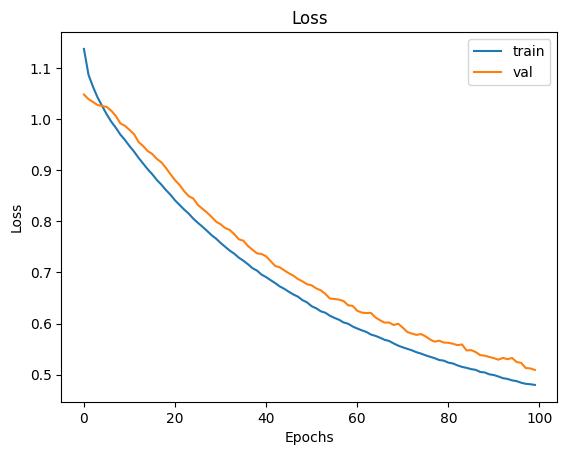

In [42]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

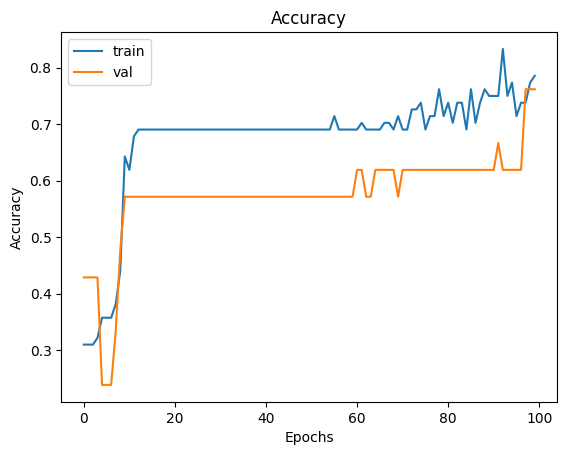

In [43]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Podemos ver que o modelo converge e tanto a performance de treino e de teste ficam equivalentes. Essa performance e convergência sugerem que escolhemos uma boa função de custo para nosso modelo.

## Exemplo:

Neste exemplo, usaremos o **MNIST**, o famoso dataset de dígitos (números de 0 a 9) escritos à mão. O objetivo do nosso modelo será o de classificar digítos, com base em imagens. Assim sendo, temos um **problema de classificação multiclasse** (pois os dados serão classificados em uma dentre 10 classes possíveis, de 0 a 9).

Primeiramente, lemos nossos dados:

In [3]:
# importa libs
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
 

In [4]:
# importa mnist
from keras.datasets import mnist

In [5]:
# reshape dos dados de treino e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Limita tamanho dos dados
X_train[:10000]
y_train[:10000]

array([5, 0, 4, ..., 6, 9, 7], dtype=uint8)

Note que acima já temos separados os dados de treino e de teste!

Pra garantir maior rapidez do algoritmo, **reescalamos** as **features** para que tenham valores entre 0 e 1:

In [8]:
# para reescalar as features, as dividimos pelo valor máximo das features de treino


Vamos converter nossos targets em matrizes com a mesma quantidade de linhas que anteriormente, mas agora com uma coluna para cada classe utilizando o to_categorical:

Vamos separar nossos dados de treino em um conjunto para treino e outro para validação. No Keras podemos tanto selecionar uma porcentagem dos dados de treino para validação, quanto passar um conjunto de validação pré-determinado.

Agora, definimos a arquitetura de nossa rede neural, usando o Keras!

Vamos construir uma rede neural simples, com 3 camadas ocultas densas e 25 neurônios em cada camada, com a função de ativação **ReLu**. Para a camada de output, usamos a **Softmax**, dado que temos um problema de classificação multiclasse.

In [ ]:
# Importação de funções úteis do Keras


# definição da arquitetura


Agora, compilamos a rede neural, explicitando o otimizador e a função de perda desejadas:

In [ ]:
# Importando o otimizador RMSprop


Dois parâmetros na função acima são importantes:
- **"loss"**, que é a função de perda a ser minimizada. Esta função depende do tipo de problema que queremos resolver. Como temos um problema de classificação multiclasse, a função de perda adequada é ou a "categorical_crossentropy" ou a "sparse_categorical_crossentropy".
- **"optimizer"**, que é o otimizador que utilizaremos para minimizar a função de perda. A escolha do otimizador é bem mais livre: é uma boa ideia testar diferentes otimizadores! Os mais utilizados são: **Adam**, **SGD** e **RMSprop**.

Por fim, treinamos a rede neural! Basta usar o método ".fit()", determinando o número de epochs bem como os dados de treino e validação:

E, pronto! A rede neural está treinada!

Como em todo problema de classificação, podemos utilizar o classification report para avaliar sua performance nos dados de teste:

In [ ]:
# fazendo as predições


# Extrai classe com maior probabilidade



In [ ]:
# exibe o classification report


Caso a performance não seja suficiente, entram os próximos passos, muito comuns em todo projeto de Deep Learning:

- Tentar arquiteturas diferentes de Redes Neurais;
- Tunar os hiperparâmetros;
- Mudar o otimizador;
- Investigar a ocorrência de overfitting, e usar técnicas de regularização;

...entre outras!

Lembre-se: a construção de um modelo de Deep Learning é um processo altamente **iterativo**, de tentativa e erro!

_____
_____



Vemos que a performance de treino não mudou, mas pioramos nossa generalização no teste
_____
_____

## **Referências**

https://playground.tensorflow.org/

https://www.deeplearningbook.com.br

https://keras.io

https://www.tensorflow.org/tutorials

https://www.louisbouchard.ai/densenet-explained/

https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html

https://valueml.com/multi-layer-perceptron-by-keras-with-example/

https://ml4a.github.io/ml4a/how_neural_networks_are_trained/

[Três formas de montar redes neurais com o Keras](https://developpaper.com/three-methods-of-constructing-neural-network-with-keras/)

[Álgebra Linear](https://mlfromscratch.com/tag/linear-algebra/)

[Comparação entre otimizadores](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)

[Binary Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

[Derivada no backpropagation: exemplo demostrando Regra da Cadeia](https://www.jeremyjordan.me/neural-networks-training/)

## **Exercício**

Você trabalhará com o conjunto de dados da Reuters, um conjunto de notícias curtas e seus tópicos, publicados pela Reuters em 1986. É um conjunto de dados de teste simples e amplamente utilizado para classificação de texto. Nele encontramos 46 temas diferentes com alguns tópicos aparecendo mais do que outros, mas cada tópico tem pelo menos 10 exemplos no conjunto de treinamento.

Esse dataset foi originalmente gerado pela análise e pré-processamento do conjunto de dados clássico Reuters-21578. Cada noticia é codificada como uma lista de índices de palavras (inteiros). Por conveniência, as palavras são indexadas pela frequência geral no conjunto de dados, de modo que, por exemplo, o inteiro "3" codifica a 3ª palavra mais frequente nos dados.

Importe os dados do `tensorflow.keras.datasets`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # num_words=10000 restringe os dados as 10.000 palavras mais frequentes encontradas nos dados

Qual o shape dos datasets?

Selecione o primeiro elemento de train_data e retorne seu tamanho

Selecione o terceiro elemento de train_data e retorne seu tamanho

Dado que cada linha do dataset de treino tem um tamanho diferente, que pré-processamento podemos fazer para deixar todas com o mesmo tamanho?

Resposta: adicionar zeros até chegar em um valor de coluna limite, limitar a quantidade para a menor, ohe

Sugestão de pré-processamento:

In [ ]:
# prepare data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    """Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would
    mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vec-
    tor that would be all 0s except for indices 8 and 5, which would be 1s. Then you
    could use a Dense layer, capable of handling floating-point vector data, as the
    first layer in your model"""
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Utilize o método `to_categorical` do `tensorflow.keras.utils` ou o `LabelBinarizer` do `sklearn.preprocessing` para converter os labels de uma coluna para n colunas.

In [ ]:
# encode labels


Vamos começar a montar nossa rede neural!

- Quantas camadas ocultas colocar?
- Quantos neurônios em cada camada oculta?
- Qual será a função de cada camada oculta?
- Quantos neurônios na camada de saída?
- Qual a função na cada camada de saída?
- Meu problema é de classificação ou regressão? Se for de classificação, é binário ou multi-classe?
- Qual função custo utilizar?
- Qual métrica para avaliar meu modelo?
- Qual otimizador usar?

Plote as curvas da função custo e sua métrica por epoch.

Seu modelo está overfitando, underfitando ou está bom? Porquê?

Se seu modelo não ficou bom, o que você pode fazer para melhorá-lo?

Compare a acurácia entre as seguintes redes neurais:

1. Uma camada densa com 64 neurônios > uma camada densa com 64 neurônios > uma camada densa com 46 neurônios
2. Uma camada densa com 64 neurônios > uma camada densa com 4 neurônios > uma camada densa com 46 neurônios


Resposta: The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is
mostly due to the fact that we’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The model is able to cram most of the necessary
information into these four-dimensional representations, but not all of it.

Faça outros testes diminuindo e aumentando tanto a quantidade de neurônios quanto a de camadas ocultas.

### Fim!

_____
_____
_____

## Aprofundamento

### Loss function: Binary Cross-Entropy Loss / Log Loss

This is the most common loss function used in classification problems. The cross-entropy loss decreases as the predicted probability converges to the actual label. It measures the performance of a classification model whose predicted output is a probability value between 0 and 1.

<img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_common-loss-functions_1.png width=400 text="https://builtin.com/machine-learning/common-loss-functions">

When the number of classes is 2, it’s binary classification.
common-loss-functions

<img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/2_common-loss-functions.png width=200 text="https://builtin.com/machine-learning/common-loss-functions" >

When the number of classes is more than 2, it’s multi-class classification.
common-loss-functions

<img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_common-loss-functions.png width=500 text="https://builtin.com/machine-learning/common-loss-functions">

We derive the cross-entropy loss formula from the regular likelihood function, but with logarithms added in.

Extraído de https://builtin.com/machine-learning/common-loss-functions

### Notação matricial das equações

Denotamos cada ativação por $a_{neuron}^{(layer)}$, por exemplo $a^{(1)}_2$ corresponderia ao neurônio número três na segunda camada (contamos a partir de 0). Assim, o número abaixo (subscrito) corresponde a qual neurônio estamos falando, e o número acima (sobrescrito) corresponde a qual camada estamos olhando, ambos contando a partir de zero.

Denotamos cada peso por $w_{to, from}^{(layer)}$, onde $to$ é denotado como $j$ e $from$ denotado como $k$, assim,  $w^2_{2,3}$ significa indo para o terceiro neurônio na terceira camada, a partir do neurônio quatro na camada anterior (segunda camada), pois contamos a partir do zero.

Exemplo de vetor de ativação para a camada zero:

$$\begin{bmatrix}
    a_0^{0}\\
    a_1^{0}\\
    \vdots \\
    a_n^{0}\\
    \end{bmatrix}
    $$

Exemplo de matriz de pesos que conectam cada neuron a próxima camada:
$$
\begin{bmatrix}
    w_{0,0} & w_{0,1} & \cdots & w_{0,k}\\
    w_{1,0} & w_{1,1} & \cdots & w_{1,k}\\
    \vdots & \vdots & \ddots & \vdots \\
    w_{j,0} & w_{j,1} & \cdots & w_{j,k}\\
    \end{bmatrix}
$$

Combinando esses dois com a matriz de bias e encapsulando na função sigmóide:

$$
\sigma \left(
    \begin{bmatrix}
    w_{0,0} & w_{0,1} & \cdots & w_{0,k}\\
    w_{1,0} & w_{1,1} & \cdots & w_{1,k}\\
    \vdots & \vdots & \ddots & \vdots \\
    w_{j,0} & w_{j,1} & \cdots & w_{j,k}\\
    \end{bmatrix}
    \, 
    \begin{bmatrix}
    a_0^{0}\\
    a_1^{0}\\
    \vdots \\
    a_n^{0}\\
    \end{bmatrix}
    +
    \begin{bmatrix}
    b_0\\
    b_1\\
    \vdots \\
    b_n\\
    \end{bmatrix}
    \right)
    $$

Podemos escrever de outra forma:

$$ a^{(1)}=
\sigma\left(
\boldsymbol{W}\boldsymbol{a}^{0}+\boldsymbol{b}
\right) $$

Ou reduzir a notação ainda mais e escrever:

$$ a^{(1)}=
\sigma\left(
\boldsymbol{z}
\right)$$

Com isso conseguimos a matriz de todas as ativações da segunda camada.


____
____
____